<a href="https://colab.research.google.com/github/tejasnikumbh999/Machine-Learning/blob/main/Machine__Learning_Titanic_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Dataset

In [ ]:
#import modules

import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
#load data

df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/titanic_train.csv')
df

#Descriptive analysis

In [ ]:
#size of dataframe

df.size

In [ ]:
#shape of dataframe

df.shape

In [ ]:
#description of dataframe

df.describe()

In [ ]:
#datatype

df.dtypes

## Pre-process Data

In [ ]:
#drop unnecessery columns

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [ ]:
#dataframe

df

In [ ]:
#datatype

df.dtypes

In [ ]:
#count null values

df.isnull().sum()

In [ ]:
#drop nan values

df.dropna(inplace=True)

In [ ]:
#count null values

df.isnull().sum()

In [ ]:
#check datatypes

df.dtypes

In [ ]:
#replace text data

df['Sex']=df['Sex'].replace(['male','female'],[0,1])

In [ ]:
#convert columnn datatype to integer

df['Sex'] = df['Sex'].astype('int')
df.dtypes

In [ ]:
#convert columnn datatype to integer

df['Age'] = df['Age'].astype('int')
df.dtypes

In [ ]:
#replace text data

df['Embarked']=df['Embarked'].replace(['C','Q','S'], [1,2,3])

In [ ]:
#convert columnn datatype to integer

df['Embarked'] = df['Embarked'].astype('int')
df.dtypes

In [ ]:
#print data head

df.head(20)

In [ ]:
#correlation matrix

df.corr()

#Selecting Dataset

In [ ]:
#Define Feature Matrix

feature_df = df[['Pclass', 'Sex', 'Age', 'Embarked']]
X = np.asarray(feature_df)
X[:5]

In [ ]:
#Define Target Variable

y = np.asarray(df['Survived'])
y [:5]

## Split Dataset into Train and Test Set

In [ ]:
#split data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#  Support Vector Machine Model

>Kernelling
- mapping data into a higher dimensional space 

>Kernel function
- The mathematical function used for the transformation

>Kernel function types:
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

>usually choose different functions in turn and compare the results.

In [ ]:
#fit data

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.10,probability=True)
clf.fit(X_train, y_train) 

In [ ]:
#predict

yhat = clf.predict(X_test)
yhat[:50]

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
#confusion matrix -- Accuracy of svm model

acc=clf.score(X_test, y_test)
acc

A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

In [ ]:
#prediction

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

In [ ]:
#print classification report

print (classification_report(y_test, yhat))

In the simplest terms, Precision is the ratio between the True Positives and all the Positives
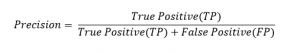

The recall is the measure of our model correctly identifying True Positives. 
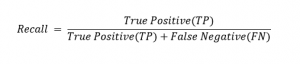

nstead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.
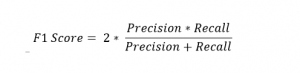

In [ ]:
# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Prediction using user inputs

In [ ]:
#prediction

a=input('Enter Passenger class (1 / 2 / 3): \t')
if a=='1':
  a=1
elif a=="2":
  a= 2
elif a=='3':
  a=3

b=input('Enter passanger gender (male / female): \t')
if b=='male':
  b=0
elif b=='female':
  b=1

c=input('Enter passanger age : \t')
if c.isnumeric()==True:
  c= int(c)

d=input('Enter passanger embarkment (C / Q / S): \t')
if d=='C':
  d=1
elif d=='Q':
  d=2
elif d=='S':
  d=3


y_pred = clf.predict([[a,b,c,d]])
y_pred
if y_pred[0]==1:
  print('\n The passanger may survive.')
  print(f'The prediction probabilities are : \t',clf.predict_proba([[a,b,c,d]]))
else:
  print('\nThe passanger may not survive.')
  print(f'The prediction probabilities are : \t',clf.predict_proba([[a,b,c,d]]))